In [92]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Indicators

In [2]:
# first of all we deserialize our dataframe
df = pd.read_csv("../dataset/customer_supermarket_sale_qta_merge.csv")
print(df.head())

   Unnamed: 0  BasketID           BasketDate  ProdID  Qta  Sale  CustomerID  \
0           0    536365  2010-01-12 08:26:00   21730    6  4.25       17850   
1           1    536365  2010-01-12 08:26:00   22752    2  7.65       17850   
2           2    536365  2010-01-12 08:26:00   71053    6  3.39       17850   
3           3    536365  2010-01-12 08:26:00  84029E    6  3.39       17850   
4           4    536365  2010-01-12 08:26:00  84029G    6  3.39       17850   

  CustomerCountry                            ProdDescr  
0  United Kingdom    GLASS STAR FROSTED T-LIGHT HOLDER  
1  United Kingdom         SET 7 BABUSHKA NESTING BOXES  
2  United Kingdom                  WHITE METAL LANTERN  
3  United Kingdom       RED WOOLLY HOTTIE WHITE HEART.  
4  United Kingdom  KNITTED UNION FLAG HOT WATER BOTTLE  


# I - indicator
the total number of items purchased by a customer during the period of
observation.

In [66]:
df_i = df.groupby("CustomerID").sum().reset_index()
df_i = df_I[["CustomerID", "Qta"]]
df_i

,CustomerID,Qta
0,12346,0
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4367,18280,45
4368,18281,54
4369,18282,98
4370,18283,1357


In [6]:
#!! look at this, it might be an outlier
print(df[df.CustomerID == 12346])

       Unnamed: 0  BasketID           BasketDate ProdID    Qta  Sale  \
37034       37034    541431  2011-01-18 10:01:00  23166  74215  1.04   
37039       37039    541433  2011-01-18 10:17:00  23166 -74215  1.04   

       CustomerID CustomerCountry                       ProdDescr  
37034       12346  United Kingdom  MEDIUM CERAMIC TOP STORAGE JAR  
37039       12346  United Kingdom  MEDIUM CERAMIC TOP STORAGE JAR  


# Iu - indicator
the number of distinct items bought by a customer in the period of
observation.

In [74]:
df_iu = df.groupby('CustomerID')['ProdID'].nunique().reset_index()
df_iu

,CustomerID,ProdID
0,12346,1
1,12347,103
2,12348,22
3,12349,73
4,12350,17
...,...,...
4367,18280,10
4368,18281,7
4369,18282,12
4370,18283,263


# Imax - indicator
the maximum number of items purchased by a customer during a
shopping session

In [73]:
df_imax = df.groupby(["CustomerID", "BasketID"]).Qta.sum()
df_imax = df_imax.groupby(level=0).head(1).reset_index()

#df_imax = df_imax.max(level=0)

df_imax

,CustomerID,BasketID,Qta
0,12346,541431,74215
1,12347,537626,319
2,12348,539318,1254
3,12349,577609,631
4,12350,543037,197
...,...,...,...
4367,18280,545712,45
4368,18281,556464,54
4369,18282,562525,75
4370,18283,540350,61


# E - indicator
the Shannon entropy on the purchasing behaviour of the customer

In [72]:
df_temp = df.groupby(["CustomerID", "BasketID"]).Qta.sum().reset_index()
values = df_temp["Qta"]
df_temp['Entropy'] = -(values*np.log(values))
df_entropy = df_temp.groupby('CustomerID')['Entropy'].sum().reset_index()
# to remove nan values caused by logs
df_entropy['Entropy'] = df_entropy['Entropy'].fillna(0)


df_entropy

/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CustomerID,Entropy
0,12346,-832300.560951
1,12347,-14642.853340
2,12348,-15464.124169
3,12349,-4068.249999
4,12350,-1040.791135
...,...,...
4367,18280,-171.299812
4368,18281,-215.405139
4369,18282,-417.113335
4370,18283,-6354.286026


### Putting together all indicators

In [83]:
frames = [df_entropy, df_imax.Qta, df_iu.ProdID, df_i.Qta]
indicators = pd.concat(frames, join='outer', axis=1)
indicators.columns = ("CustomerID", "Entropy", "imax", "iu", "i")
indicators

indicators.to_csv("../dataset/indicators.csv")

# Additional indicators

### Sales per country
(is this even an indicator?)

In [85]:
df

,Unnamed: 0,BasketID,BasketDate,ProdID,Qta,Sale,CustomerID,CustomerCountry,ProdDescr,I
0,0,536365,2010-01-12 08:26:00,21730,6,4.25,17850,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,NaN
1,1,536365,2010-01-12 08:26:00,22752,2,7.65,17850,United Kingdom,SET 7 BABUSHKA NESTING BOXES,NaN
2,2,536365,2010-01-12 08:26:00,71053,6,3.39,17850,United Kingdom,WHITE METAL LANTERN,NaN
3,3,536365,2010-01-12 08:26:00,84029E,6,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,NaN
4,4,536365,2010-01-12 08:26:00,84029G,6,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,NaN
...,...,...,...,...,...,...,...,...,...,...
396682,396682,581587,2011-09-12 12:50:00,22899,6,2.10,12680,France,CHILDREN'S APRON DOLLY GIRL,NaN
396683,396683,581587,2011-09-12 12:50:00,23254,4,4.15,12680,France,CHILDRENS CUTLERY DOLLY GIRL,NaN
396684,396684,581587,2011-09-12 12:50:00,23255,4,4.15,12680,France,CHILDRENS CUTLERY CIRCUS PARADE,NaN
396685,396685,581587,2011-09-12 12:50:00,23256,4,4.15,12680,France,CHILDRENS CUTLERY SPACEBOY,NaN


In [97]:
df_sales_per_country = df.groupby(["CustomerCountry"])["Sale"].sum().reset_index()
print(df_sales_per_country)

         CustomerCountry          Sale
0              Australia  4.048000e+03
1                Austria  1.701520e+03
2                Bahrain  7.895000e+01
3                Belgium  7.540130e+03
4                 Brazil  1.426000e+02
5                 Canada  9.105800e+02
6        Channel Islands  3.736900e+03
7                 Cyprus  3.880040e+03
8         Czech Republic  8.815000e+01
9                Denmark  1.266950e+03
10                  EIRE  3.820926e+04
11    European Community  2.940500e+02
12               Finland  3.786850e+03
13                France  4.284323e+04
14               Germany  3.763344e+04
15                Greece  7.132900e+02
16               Iceland  4.812100e+02
17                Israel  9.066500e+02
18                 Italy  3.879390e+03
19                 Japan  8.148600e+02
20               Lebanon  2.424400e+02
21             Lithuania  9.944000e+01
22                 Malta  6.660100e+02
23           Netherlands  6.492550e+03
24                Norway 

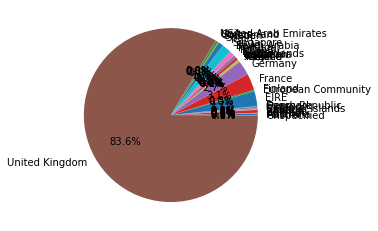

In [105]:
# the pie plot is horrible because of england, that probably has some outliers
#explode=np.zeros(len(df_sales_per_country.CustomerCountry))

plt.pie(df_sales_per_country.Sale, labels=df_sales_per_country.CustomerCountry, autopct='%1.1f%%')
plt.show()